# Problem Statement
- In this project our goal is to preprocess the whatsapp chat file.
- Make a sentiment of each text.
- Generate a report of the text.

# import packages

In [1]:
import pandas as pd
import re
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Read the data file
- After reading the file make the pattern to saperate the date/time and message.

In [2]:
with open('WhatsApp Chat with ·íç·ó©·êØ·ó©À¢·∂ú ≥‚Å±·µñ·µó üëÄ.txt',"r",encoding='utf-8') as f:
    data=f.read()
data

'9/21/23, 8:49\u202fPM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n9/21/23, 8:49\u202fPM - Ali created group "·íç·ó©·êØ·ó©À¢·∂ú ≥‚Å±·µñ·µó üëÄ"\n9/21/23, 8:49\u202fPM - Ali added you\n9/21/23, 8:49\u202fPM - Ali changed this group\'s icon\n9/21/23, 8:50\u202fPM - Ali: <Media omitted>\n9/21/23, 8:50\u202fPM - +923187350866: Ok g peero.\n9/21/23, 8:50\u202fPM - You\'re now an admin\n9/21/23, 8:50\u202fPM - ü•∞ Samiullah ü•∞: Ok I will add\n9/21/23, 8:52\u202fPM - ü•∞ Samiullah ü•∞: <Media omitted>\n9/21/23, 8:52\u202fPM - Ali: File ka name change kar dety ta k record ma para rehata\n9/21/23, 8:53\u202fPM - ü•∞ Samiullah ü•∞: Yr hr 1 is video ko lazmi dkna or 2 dfa lazmi practice krna\n9/21/23, 8:53\u202fPM - ü•∞ Samiullah ü•∞: Next video ma Change kro ga\n9/21/23, 8:53\u202fPM - Ali: Ok\n9/21/23, 8:53\u202fPM - Saad: Haseeb ko b add krdo\n9/21/23, 8:54\u202fPM - Ali: Parivacy Thai 

In [3]:
print(data)

9/21/23, 8:49‚ÄØPM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
9/21/23, 8:49‚ÄØPM - Ali created group "·íç·ó©·êØ·ó©À¢·∂ú ≥‚Å±·µñ·µó üëÄ"
9/21/23, 8:49‚ÄØPM - Ali added you
9/21/23, 8:49‚ÄØPM - Ali changed this group's icon
9/21/23, 8:50‚ÄØPM - Ali: <Media omitted>
9/21/23, 8:50‚ÄØPM - +923187350866: Ok g peero.
9/21/23, 8:50‚ÄØPM - You're now an admin
9/21/23, 8:50‚ÄØPM - ü•∞ Samiullah ü•∞: Ok I will add
9/21/23, 8:52‚ÄØPM - ü•∞ Samiullah ü•∞: <Media omitted>
9/21/23, 8:52‚ÄØPM - Ali: File ka name change kar dety ta k record ma para rehata
9/21/23, 8:53‚ÄØPM - ü•∞ Samiullah ü•∞: Yr hr 1 is video ko lazmi dkna or 2 dfa lazmi practice krna
9/21/23, 8:53‚ÄØPM - ü•∞ Samiullah ü•∞: Next video ma Change kro ga
9/21/23, 8:53‚ÄØPM - Ali: Ok
9/21/23, 8:53‚ÄØPM - Saad: Haseeb ko b add krdo
9/21/23, 8:54‚ÄØPM - Ali: Parivacy Thai link deya
9/21/23, 8:54‚ÄØPM - Ali added Simple üòä
9/21/23, 

# Note
- This is the data in raw form.
- Now we can saperate the date and user messages.
- We use regular expression to solve this

In [4]:
pattern=r"\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}"
date=re.findall(pattern,data)

In [5]:
pattern = r'\d{1,2}/\d{1,2}/\d{2}, \d{1,2}:\d{2}‚ÄØ[AP]M - (.*)'

# Extracting the text using findall method
messages = re.findall(pattern, data)
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 'Ali created group "·íç·ó©·êØ·ó©À¢·∂ú ≥‚Å±·µñ·µó üëÄ"',
 'Ali added you',
 "Ali changed this group's icon",
 'Ali: <Media omitted>',
 '+923187350866: Ok g peero.',
 "You're now an admin",
 'ü•∞ Samiullah ü•∞: Ok I will add',
 'ü•∞ Samiullah ü•∞: <Media omitted>',
 'Ali: File ka name change kar dety ta k record ma para rehata',
 'ü•∞ Samiullah ü•∞: Yr hr 1 is video ko lazmi dkna or 2 dfa lazmi practice krna',
 'ü•∞ Samiullah ü•∞: Next video ma Change kro ga',
 'Ali: Ok',
 'Saad: Haseeb ko b add krdo',
 'Ali: Parivacy Thai link deya',
 'Ali added Simple üòä',
 'Ali: @923471574766 Haseeb ko b send kro lecture',
 'Ali: Ak baar pir',
 'Saad: Acha',
 "Bashii joined using this group's invite link",
 'ü•∞ Samiullah ü•∞: <Media omitted>',
 'Ali: Ok',
 "+92 334 8949513 joined using this group's invite link",
 'ü•∞ Samiullah ü•∞: Aslam-o-Al

# Make a datafreme of message and date

In [6]:
df=pd.DataFrame({"date":date,"mess":messages})
df.sample(10)

date                                               mess
234  11/1/23, 12:31           +92 313 5590244 joined using your invite
267   11/2/23, 3:11                       +92 313 5590244: class Node{
451   3/11/24, 8:25      Ali: Sir bol rhay han 9 Sy 1 woi pornana time
111   9/27/23, 2:56                       Umer: Once again br in limit
381  1/24/24, 12:03  Saad: In dono ny shd just first page sy e incr...
446   3/10/24, 7:21     ·¥õ·¥Ä è è·¥Ä ô üíî joined using this group's invite link
34    9/24/23, 7:13                     ü•∞ Samiullah ü•∞: Aslam-o-Alaikum
408  2/13/24, 10:59                     ü•∞ Samiullah ü•∞: <Media omitted>
47    9/24/23, 9:21                                       Simple üòä: Ok
518   3/29/24, 2:05  +92 315 5272194: https://buildyourfuture.withg...

# Saperate the user name and user message

In [7]:
user=[]
message=[]
for mess in df['mess']:
    entry=re.split('([\w\W]+?):\s',mess)
    if(entry[1:]):
        user.append(entry[1])
        message.append(entry[2])
    else:
        user.append("invitation")
        message.append(entry[0])

In [8]:
message

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 'Ali created group "·íç·ó©·êØ·ó©À¢·∂ú ≥‚Å±·µñ·µó üëÄ"',
 'Ali added you',
 "Ali changed this group's icon",
 '<Media omitted>',
 'Ok g peero.',
 "You're now an admin",
 'Ok I will add',
 '<Media omitted>',
 'File ka name change kar dety ta k record ma para rehata',
 'Yr hr 1 is video ko lazmi dkna or 2 dfa lazmi practice krna',
 'Next video ma Change kro ga',
 'Ok',
 'Haseeb ko b add krdo',
 'Parivacy Thai link deya',
 'Ali added Simple üòä',
 '@923471574766 Haseeb ko b send kro lecture',
 'Ak baar pir',
 'Acha',
 "Bashii joined using this group's invite link",
 '<Media omitted>',
 'Ok',
 "+92 334 8949513 joined using this group's invite link",
 'Aslam-o-Alaikum',
 'W.slm',
 'Agr ap log pali wali video ki practice kr chuck ha to next bj do',
 '<Media omitted>',
 '<Media omitted>',
 '<Media omitted>',
 '<Media omitted>',
 'Acham',
 'Acha*',
 

In [9]:
df.head(2)

date                                               mess
0  9/21/23, 8:49  Messages and calls are end-to-end encrypted. N...
1  9/21/23, 8:49                   Ali created group "·íç·ó©·êØ·ó©À¢·∂ú ≥‚Å±·µñ·µó üëÄ"

In [10]:
df['user']=user
df['message']=message

In [11]:
df.head(2)

date                                               mess  \
0  9/21/23, 8:49  Messages and calls are end-to-end encrypted. N...   
1  9/21/23, 8:49                   Ali created group "·íç·ó©·êØ·ó©À¢·∂ú ≥‚Å±·µñ·µó üëÄ"   

         user                                            message  
0  invitation  Messages and calls are end-to-end encrypted. N...  
1  invitation                   Ali created group "·íç·ó©·êØ·ó©À¢·∂ú ≥‚Å±·µñ·µó üëÄ"

In [12]:
df.isnull().sum()

date       0
mess       0
user       0
message    0
dtype: int64

# Convert date to datetime

In [13]:
df['date']=pd.to_datetime(df['date'])

In [14]:
df.head(2)

date                                               mess  \
0 2023-09-21 08:49:00  Messages and calls are end-to-end encrypted. N...   
1 2023-09-21 08:49:00                   Ali created group "·íç·ó©·êØ·ó©À¢·∂ú ≥‚Å±·µñ·µó üëÄ"   

         user                                            message  
0  invitation  Messages and calls are end-to-end encrypted. N...  
1  invitation                   Ali created group "·íç·ó©·êØ·ó©À¢·∂ú ≥‚Å±·µñ·µó üëÄ"

# Extract month,day,hour,min,minute and year

In [15]:
df['year']=df['date'].dt.year

In [16]:
df['month']=df['date'].dt.month_name()
df['day']=df['date'].dt.day_name()
df['hour']=df['date'].dt.hour
df['min']=df['date'].dt.minute

In [17]:
df.drop(columns=['mess'],inplace=True)

In [18]:
df.sample(5)

date             user  \
239 2023-11-01 08:09:00    ü•∞ Samiullah ü•∞   
302 2023-11-03 09:56:00  +92 313 5590244   
428 2024-02-19 09:33:00              Ali   
191 2023-10-29 06:25:00             Umer   
156 2023-10-12 02:44:00    ü•∞ Samiullah ü•∞   

                                               message  year     month  \
239                                    <Media omitted>  2023  November   
302                                     Good luck boys  2023  November   
428                                                  .  2024  February   
191                                    <Media omitted>  2023   October   
156  Or video b watch krna data structure Start kr ...  2023   October   

           day  hour  min  
239  Wednesday     8    9  
302     Friday     9   56  
428     Monday     9   33  
191     Sunday     6   25  
156   Thursday     2   44

# Conlcussion
- We can preprocess the data now my next goal is to apply the pretrain model for sentiment.

# Apply `pre train` model for sentiment

In [19]:
# !pip install vaderSentiment

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [21]:
analyser=SentimentIntensityAnalyzer()
df['sentiment']=df['message'].apply(lambda x:analyser.polarity_scores(x)['compound'])

In [22]:
def sentiment(text_score):
    if(text_score>=0.05):
        return "positive"
    elif(text_score<=-0.05):
        return "negative"
    else:
        return "neutral"

In [23]:
df

date             user  \
0   2023-09-21 08:49:00       invitation   
1   2023-09-21 08:49:00       invitation   
2   2023-09-21 08:49:00       invitation   
3   2023-09-21 08:49:00       invitation   
4   2023-09-21 08:50:00              Ali   
..                  ...              ...   
538 2024-04-22 07:41:00  +92 311 5315883   
539 2024-04-22 07:41:00  +92 310 8693865   
540 2024-04-22 07:43:00              Ali   
541 2024-04-22 08:13:00  +92 319 5168825   
542 2024-05-23 03:39:00       invitation   

                                               message  year      month  \
0    Messages and calls are end-to-end encrypted. N...  2023  September   
1                     Ali created group "·íç·ó©·êØ·ó©À¢·∂ú ≥‚Å±·µñ·µó üëÄ"  2023  September   
2                                        Ali added you  2023  September   
3                        Ali changed this group's icon  2023  September   
4                                      <Media omitted>  2023  September   
..                                                 ...   ...        ...   
538                                              Ala g  2024      April   
539                                              Ameen  2024      April   
540                                 Allah kamyab karse  2024      April   
541                                              Ameen  2024      April   
542                                        Bashii left  2024        May   

          day  hour  min  sentiment  
0    Thursday     8   49     -0.296  
1    Thursday     8   49      0.250  
2    Thursday     8   49      0.000  
3    Thursday     8   49      0.000  
4    Thursday     8   50      0.000  
..        ...   ...  ...        ...  
538    Monday     7   41      0.000  
539    Monday     7   41      0.000  
540    Monday     7   43      0.000  
541    Monday     8   13      0.000  
542  Thursday     3   39      0.000  

[543 rows x 9 columns]

In [24]:
df['sentiment']=df['sentiment'].apply(sentiment)

In [25]:
df[df['sentiment']=='negative']

date              user  \
0   2023-09-21 08:49:00        invitation   
63  2023-09-26 06:45:00          Simple üòä   
76  2023-09-26 07:01:00          Simple üòä   
77  2023-09-26 07:01:00          Simple üòä   
103 2023-09-27 02:53:00              Umer   
104 2023-09-27 02:53:00     +923187350866   
137 2023-10-02 10:40:00          Simple üòä   
218 2023-10-31 05:59:00  HusnAin nAinOüí´üî•‚ú®   
280 2023-11-02 03:20:00   +92 313 5590244   
288 2023-11-02 03:24:00   +92 313 5590244   
312 2023-11-03 09:57:00  HusnAin nAinOüí´üî•‚ú®   
319 2023-11-03 09:58:00              Adil   
322 2023-11-03 09:59:00              Saad   
326 2023-11-03 09:59:00              Adil   
333 2023-11-03 10:00:00        invitation   
339 2023-12-14 09:58:00              Saad   
363 2024-01-12 09:06:00              Adil   
420 2024-02-13 11:00:00               Ali   
421 2024-02-13 11:00:00     ü•∞ Samiullah ü•∞   
466 2024-03-15 09:40:00               Ali   
469 2024-03-15 09:58:00          ·¥õ·¥Ä è è·¥Ä ô üíî   
493 2024-03-28 07:16:00               Ali   

                                               message  year      month  \
0    Messages and calls are end-to-end encrypted. N...  2023  September   
63                                      Question no 7?  2023  September   
76       Question no 6 me power me 2 ki Jagah e ata hy  2023  September   
77                                Sorry question no 10  2023  September   
103                                         Avoid this  2023  September   
104                                 Kia bol raha ha wo  2023  September   
137                                           No issue  2023    October   
218              Sara paper isi ma sa ai ga kia sl...?  2023    October   
280       Cheating waly hazrat likh sakty hain dekh kr  2023   November   
288                      Inbox bich bich msg pay anden  2023   November   
312  Ku ap ko hta doa sir nai kia hmai b kuch imo b...  2023   November   
319  @923471574766 Saad bae append or pend likhna h...  2023   November   
322                                G jis mn demand hgi  2023   November   
326                                Okay g confused tha  2023   November   
333                              HusnAin nAinOüí´üî•‚ú® left  2023   November   
339                    Wo aaj paper deny nahi aiya na?  2023   December   
363                                           Kia howa  2024    January   
420                Larkon ko nakami tension ma na dalo  2024   February   
421                                    Tension na lo g  2024   February   
466      100 time practice roll no 7.26.26.22.30.12.14  2024      March   
469  Roll no 1, 9 our 18 ka ilawa Sab 100 time likh...  2024      March   
493                                  Ni tu ham kia han  2024      March   

           day  hour  min sentiment  
0     Thursday     8   49  negative  
63     Tuesday     6   45  negative  
76     Tuesday     7    1  negative  
77     Tuesday     7    1  negative  
103  Wednesday     2   53  negative  
104  Wednesday     2   53  negative  
137     Monday    10   40  negative  
218    Tuesday     5   59  negative  
280   Thursday     3   20  negative  
288   Thursday     3   24  negative  
312     Friday     9   57  negative  
319     Friday     9   58  negative  
322     Friday     9   59  negative  
326     Friday     9   59  negative  
333     Friday    10    0  negative  
339   Thursday     9   58  negative  
363     Friday     9    6  negative  
420    Tuesday    11    0  negative  
421    Tuesday    11    0  negative  
466     Friday     9   40  negative  
469     Friday     9   58  negative  
493   Thursday     7   16  negative

In [26]:
df.head(2)

date        user  \
0 2023-09-21 08:49:00  invitation   
1 2023-09-21 08:49:00  invitation   

                                             message  year      month  \
0  Messages and calls are end-to-end encrypted. N...  2023  September   
1                   Ali created group "·íç·ó©·êØ·ó©À¢·∂ú ≥‚Å±·µñ·µó üëÄ"  2023  September   

        day  hour  min sentiment  
0  Thursday     8   49  negative  
1  Thursday     8   49  positive

In [27]:
temp2=df[df['user']=='Ali']
temp2

date user  \
4   2023-09-21 08:50:00  Ali   
9   2023-09-21 08:52:00  Ali   
12  2023-09-21 08:53:00  Ali   
14  2023-09-21 08:54:00  Ali   
16  2023-09-21 08:55:00  Ali   
..                  ...  ...   
512 2024-03-28 09:49:00  Ali   
516 2024-03-29 11:22:00  Ali   
517 2024-03-29 11:22:00  Ali   
526 2024-04-01 07:22:00  Ali   
540 2024-04-22 07:43:00  Ali   

                                               message  year      month  \
4                                      <Media omitted>  2023  September   
9    File ka name change kar dety ta k record ma pa...  2023  September   
12                                                  Ok  2023  September   
14                             Parivacy Thai link deya  2023  September   
16          @923471574766 Haseeb ko b send kro lecture  2023  September   
..                                                 ...   ...        ...   
512                Sub loog play ki trha shant hu jio   2024      March   
516                                                     2024      March   
517                                    <Media omitted>  2024      March   
526                                    <Media omitted>  2024      April   
540                                 Allah kamyab karse  2024      April   

          day  hour  min sentiment  
4    Thursday     8   50   neutral  
9    Thursday     8   52   neutral  
12   Thursday     8   53  positive  
14   Thursday     8   54   neutral  
16   Thursday     8   55   neutral  
..        ...   ...  ...       ...  
512  Thursday     9   49  positive  
516    Friday    11   22   neutral  
517    Friday    11   22   neutral  
526    Monday     7   22   neutral  
540    Monday     7   43   neutral  

[86 rows x 9 columns]

# Exploratory Data Analysis

In [28]:
df['user'] = df['user'].astype(str)
df.head(1)

date        user  \
0 2023-09-21 08:49:00  invitation   

                                             message  year      month  \
0  Messages and calls are end-to-end encrypted. N...  2023  September   

        day  hour  min sentiment  
0  Thursday     8   49  negative

### top 5 most active user 

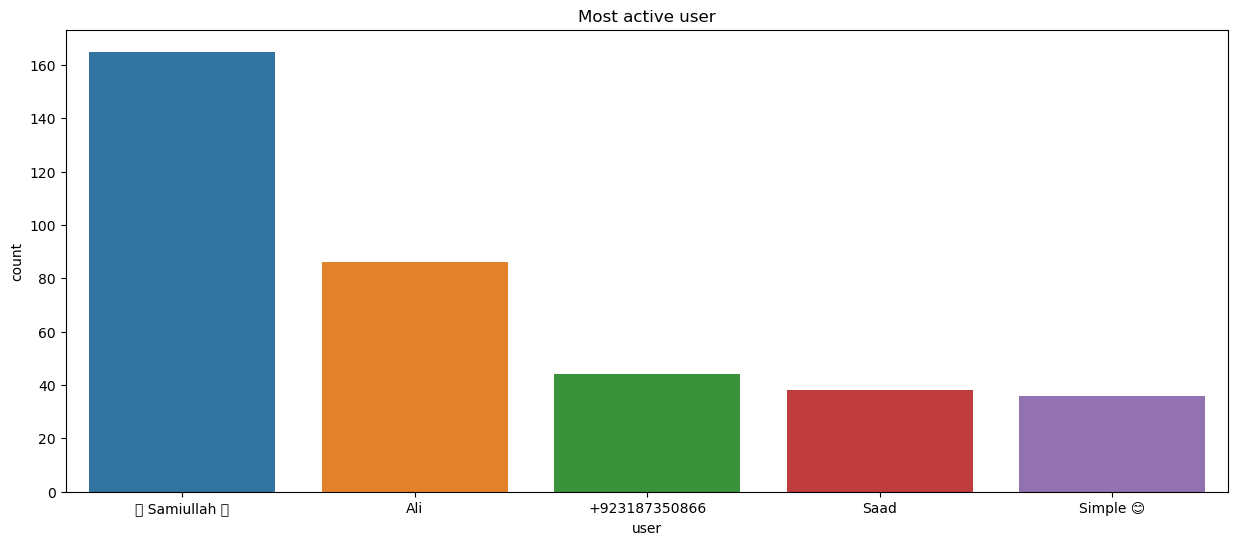

In [29]:
temp=df[df['user']!='invitation']['user'].value_counts().reset_index().head(5)
plt.figure(figsize=(15,6))
plt.title("Most active user")
sns.barplot(x=temp['user'],y=temp['count'])
plt.show()

# Distrubution of sentiment

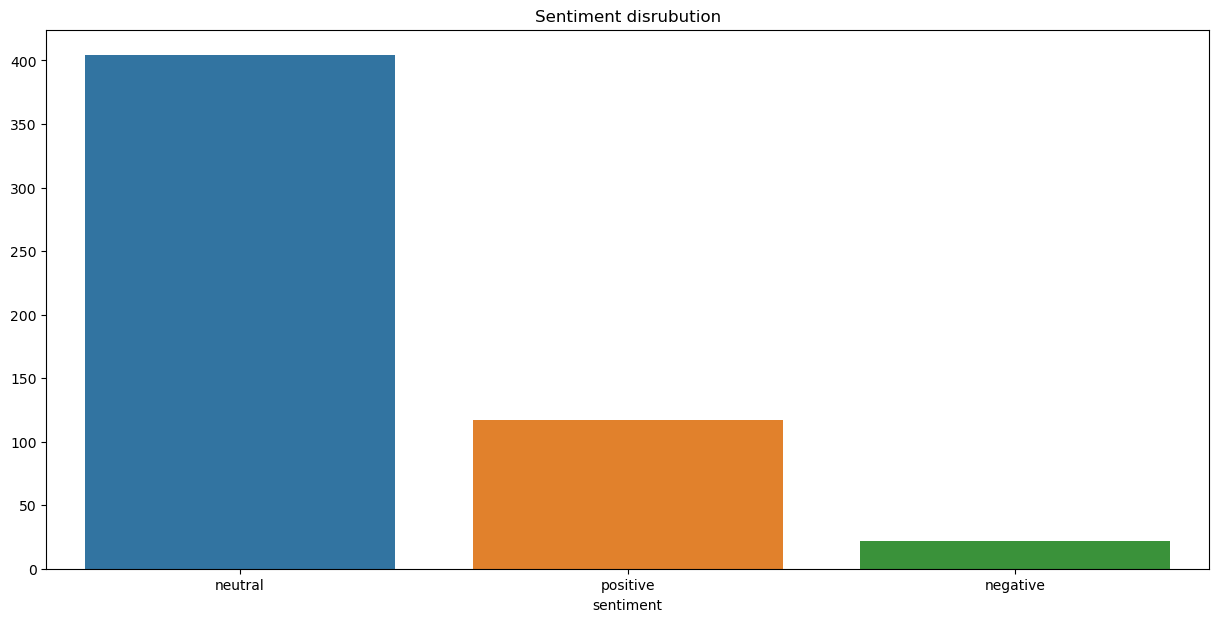

In [30]:
plt.figure(figsize=(15,7))
plt.title("Sentiment disrubution")
sns.barplot(x=df['sentiment'].value_counts().index,
            y=df['sentiment'].value_counts().values)
plt.show()

# find the user who send most message and then find which day they send how many messages

In [31]:
df.head(2)

date        user  \
0 2023-09-21 08:49:00  invitation   
1 2023-09-21 08:49:00  invitation   

                                             message  year      month  \
0  Messages and calls are end-to-end encrypted. N...  2023  September   
1                   Ali created group "·íç·ó©·êØ·ó©À¢·∂ú ≥‚Å±·µñ·µó üëÄ"  2023  September   

        day  hour  min sentiment  
0  Thursday     8   49  negative  
1  Thursday     8   49  positive

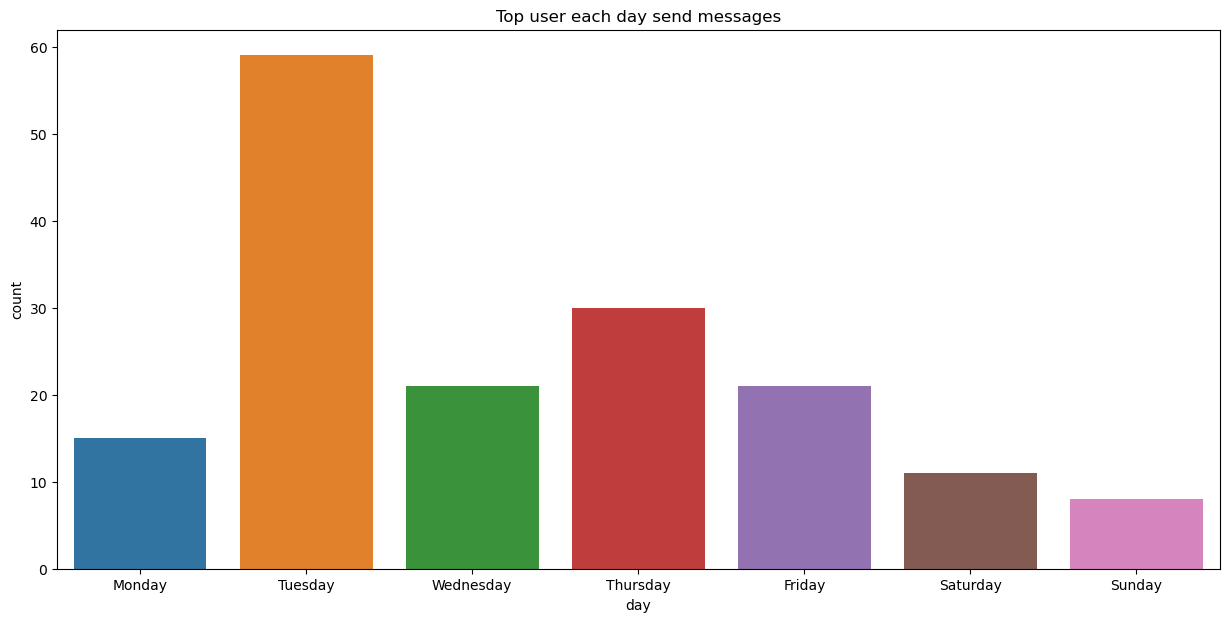

In [32]:
top_user=df['user'].value_counts().idxmax()
temp=df[df['user']==top_user].groupby(['day'])['user'].value_counts().reset_index()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(15,7))
plt.title("Top user each day send messages")
sns.barplot(x=temp['day'],
            y=temp['count'],order=day_order)
plt.show()

# Monthly Statcs

In [33]:
temp=df.groupby(['month'])['user'].value_counts().reset_index()
temp

month              user  count
0       April     +923187350866      5
1       April        invitation      4
2       April          ·¥õ·¥Ä è è·¥Ä ô üíî      2
3       April               Ali      2
4       April          Simple üòä      1
..        ...               ...    ...
68  September               Ali     16
69  September              Saad     12
70  September        invitation     12
71  September     +923187350866     10
72  September  HusnAin nAinOüí´üî•‚ú®      1

[73 rows x 3 columns]

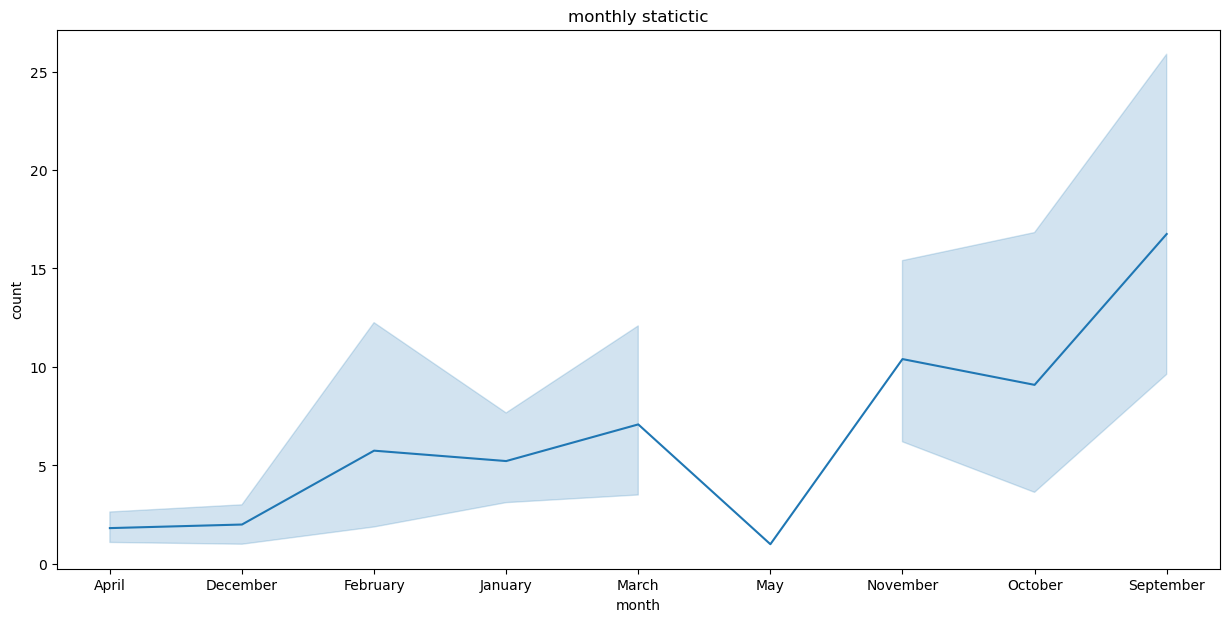

In [34]:
plt.figure(figsize=(15,7))
plt.title("monthly statictic")
sns.lineplot(x=temp['month'],y=temp['count'])
plt.show()

# most busy day

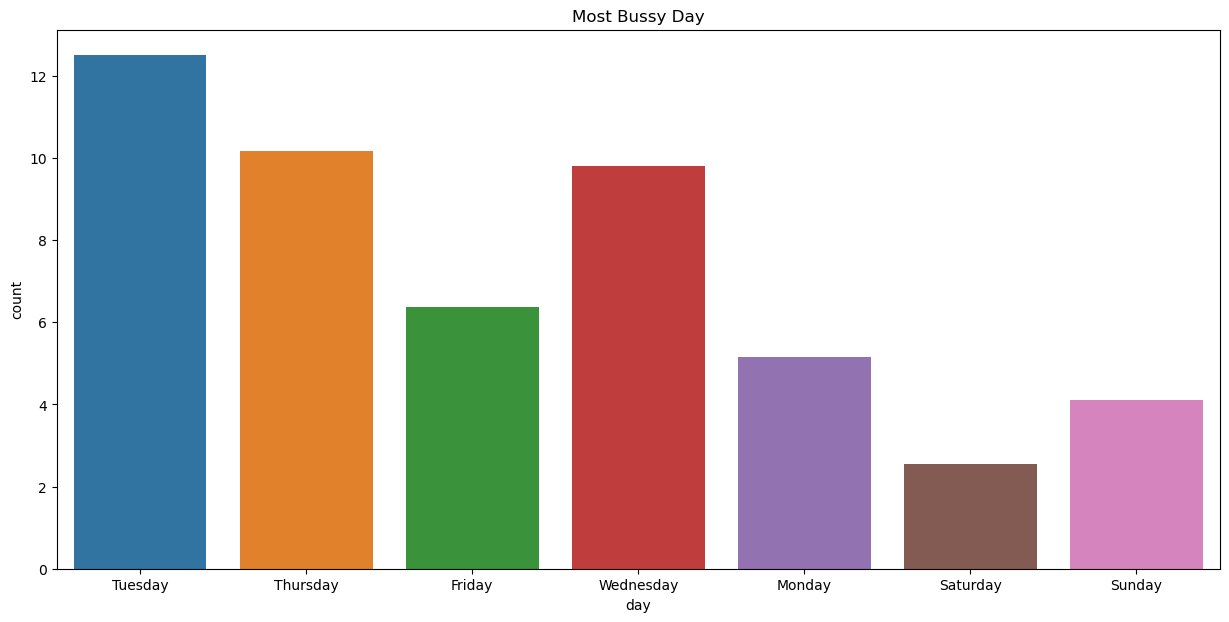

In [416]:
# most bussy day
temp=df.groupby(['user'])['day'].value_counts().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,7))
plt.title("Most Bussy Day")
sns.barplot(x=temp['day'],
            y=temp['count'],errorbar=None)
plt.show()

# Most bussy month

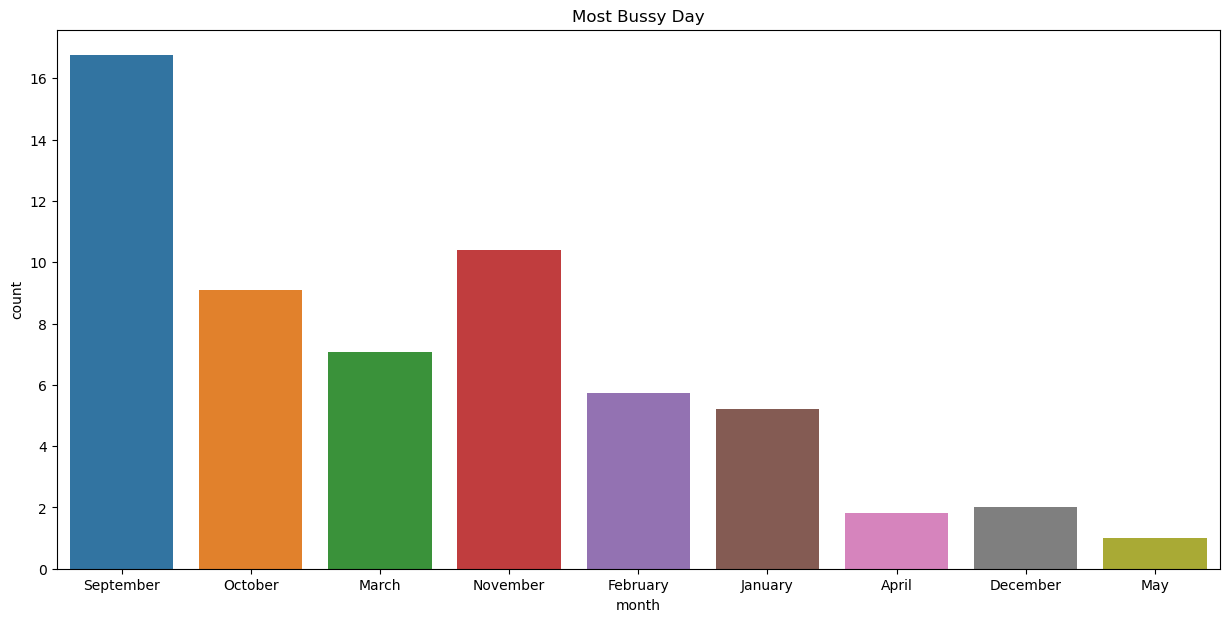

In [417]:
# most bussy month
temp=df.groupby(['user'])['month'].value_counts().sort_values(ascending=False).reset_index()
temp
plt.figure(figsize=(15,7))
plt.title("Most Bussy Day")
sns.barplot(x=temp['month'],
            y=temp['count'],errorbar=None)
plt.show()

# Find the user they can use most negative words

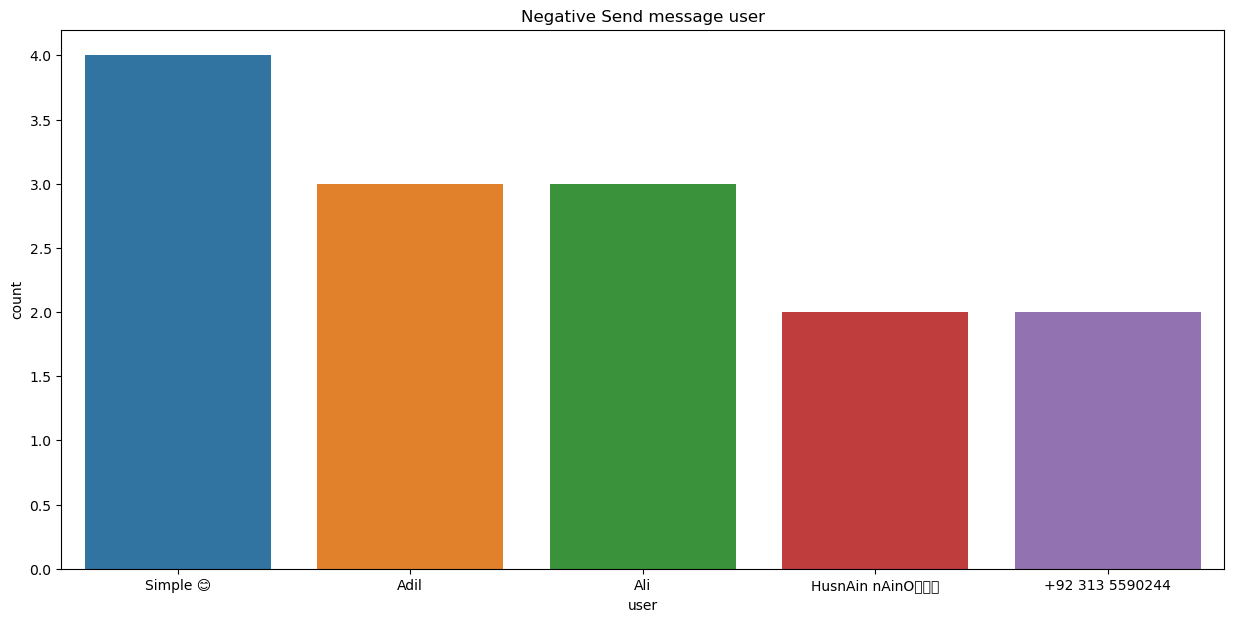

In [418]:
temp=df[df['user']!='invitation']
temp=temp[temp['sentiment']=='negative']['user'].value_counts().reset_index().head(5)
plt.figure(figsize=(15,7))
plt.title("Negative Send message user")
sns.barplot(x=temp['user'],y=temp['count'])
plt.show()

# Word Cloud
- For postive ,negative and neutral messages

In [419]:
from wordcloud import WordCloud
def fun_to_get_sentiment(text):
    temp=df[df['user']!='invitation']
    courpus=temp[temp['sentiment']==text]['message'].tolist()
    return " ".join(courpus)

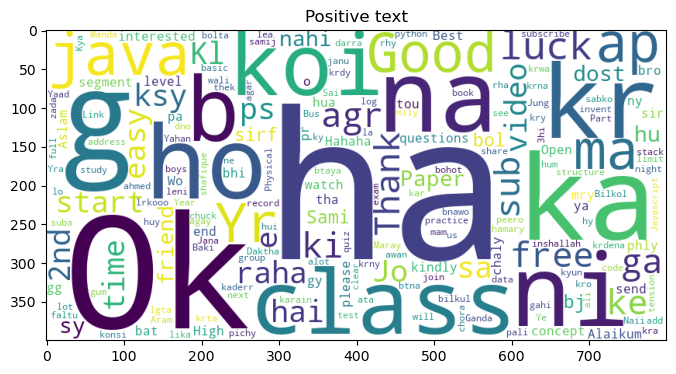

In [420]:
# Show the word cloud of positive,negative and neutral text
pos_text=fun_to_get_sentiment("positive")
cloud=WordCloud(background_color='white',width=800, height=400).generate(pos_text)
plt.figure(figsize=(8,6))
plt.title("Positive text")
plt.imshow(cloud)
plt.show()

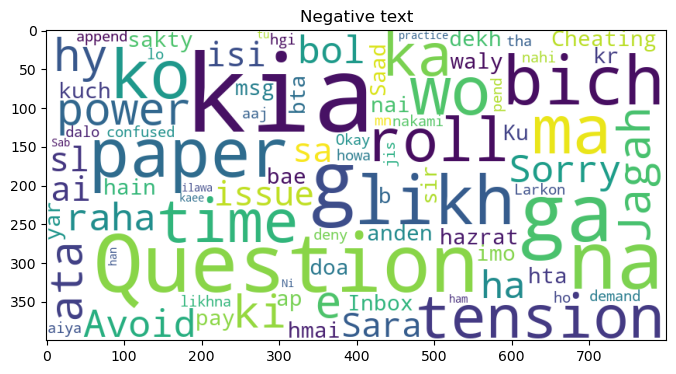

In [421]:
neg_text=fun_to_get_sentiment("negative")
cloud2=WordCloud(background_color='white',width=800, height=400).generate(neg_text)
plt.figure(figsize=(8,6))
plt.title("Negative text")
plt.imshow(cloud2)
plt.show()

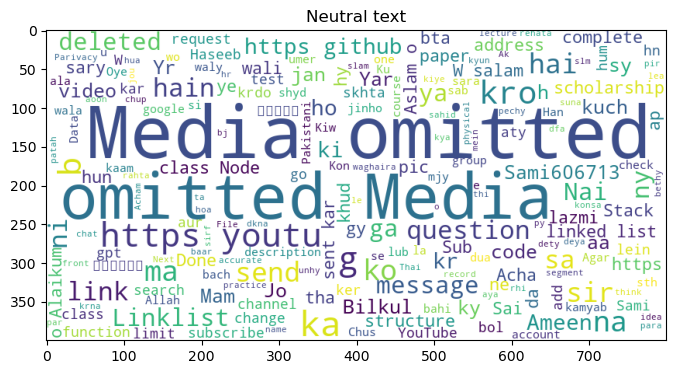

In [422]:
neu_text=fun_to_get_sentiment("neutral")
cloud3=WordCloud(background_color='white',width=800, height=400).generate(neu_text)
plt.figure(figsize=(8,6))
plt.title("Neutral text")
plt.imshow(cloud3)
plt.show()

In [423]:
df.head(2)

date        user  \
0 2023-09-21 08:49:00  invitation   
1 2023-09-21 08:49:00  invitation   

                                             message  year      month  \
0  Messages and calls are end-to-end encrypted. N...  2023  September   
1                   Ali created group "·íç·ó©·êØ·ó©À¢·∂ú ≥‚Å±·µñ·µó üëÄ"  2023  September   

        day  hour  min sentiment  
0  Thursday     8   49  negative  
1  Thursday     8   49  positive